In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('medical_examination.csv')

In [4]:
df['BMI'] = (round(df['weight']/(df['height']/100)**2,1))

In [5]:
df['overweight'] = np.where(df['BMI'] >= 25.0,1,0)

In [6]:
for i in df[['cholesterol','gluc']]:
    df[i] = np.where(df[i] == 1,0,1)

In [9]:
cardio_columns = ['active','alco','cholesterol','gluc','overweight','smoke','cardio']
cardio_none = df[cardio_columns][df['cardio'] == 0]
cardio_one = df[cardio_columns][df['cardio'] == 1]

In [10]:
df_cardio_long = pd.melt(df, id_vars='cardio', value_vars=cardio_columns[:-1],value_name='value')

In [11]:
new = pd.DataFrame({'total':(df_cardio_long.groupby(['cardio','variable'])['value']).value_counts()}).reset_index()

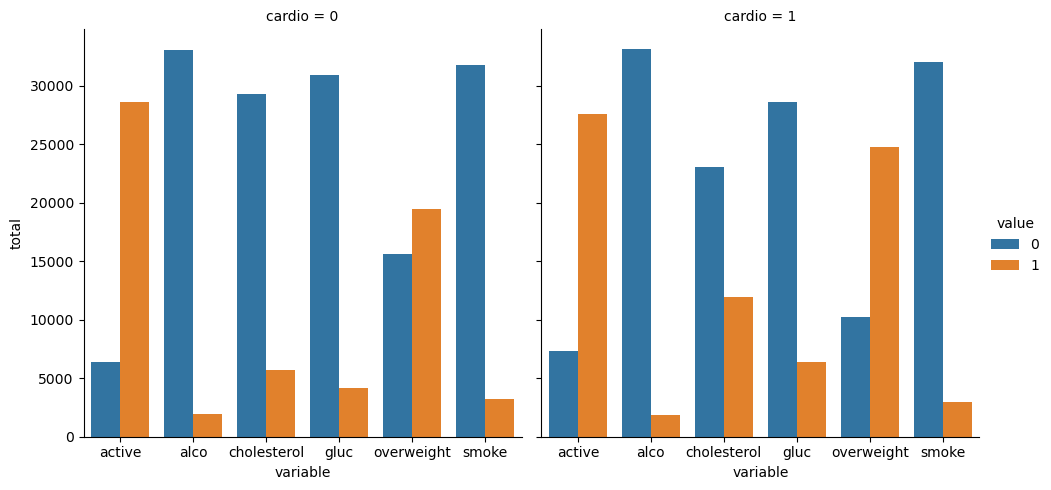

In [12]:
catplot = sns.catplot(new,
            x='variable',
           y='total',
           col='cardio',
           hue='value',
           kind='bar')

In [13]:
catplot.fig.savefig('output/catplot.png')

In [14]:
df = df[(df['ap_lo']>=0) & (df['ap_hi']>=0)]
df = df[df['ap_lo']<=df['ap_hi']]

In [15]:
for col in df[['height','weight']].columns:
    lower_percentile = df[col].quantile(0.025)
    higher_percentile = df[col].quantile(0.975)

    df = df[(df[col]>=lower_percentile) & (df[col]<=higher_percentile)]

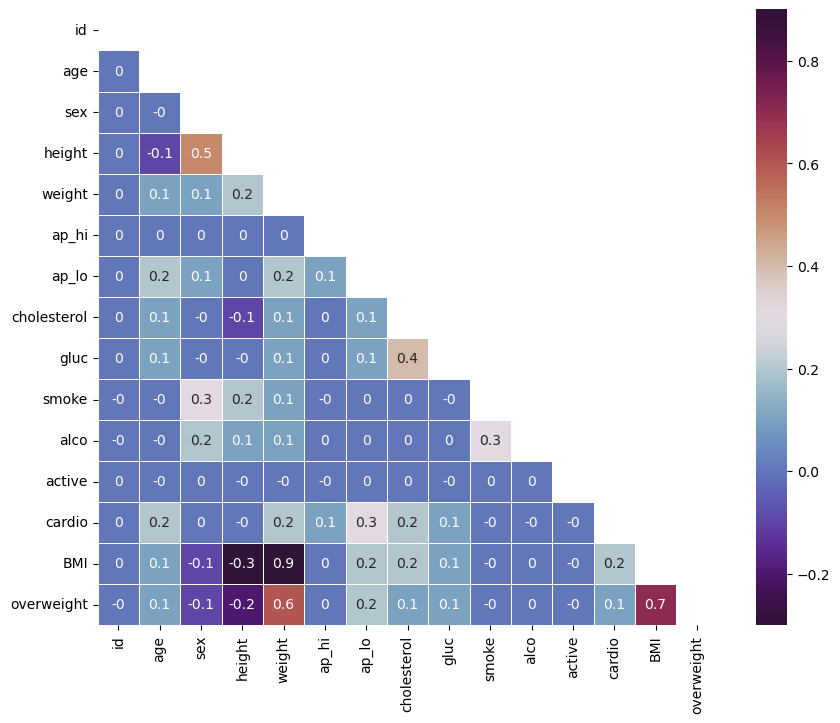

In [46]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,8))
heatmap = sns.heatmap(round(corr,1),
            annot=True,
           mask=mask,
           cmap='twilight_shifted',
           linewidths=0.5)

In [50]:
heatmap.figure.savefig('output/heatmap.png')